In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

# 1. 암 예측

In [3]:
from sklearn.datasets import load_breast_cancer, load_digits
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# 데이터 입력
X = cancer.data
Y = cancer.target

In [5]:
# 은닉층 설정
model = Sequential([
    Dense(30, input_dim=30, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,415
Trainable params: 1,415
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# 모델 저장 폴더 생성
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [8]:
# 저장 모델명 설정
modelpath = MODEL_DIR + "breast_cancer_final{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [9]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [10]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.2, epochs=5000, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 134.33994, saving model to ./model/breast_cancer_final001-134.3399.hdf5

Epoch 00002: val_loss improved from 134.33994 to 127.64584, saving model to ./model/breast_cancer_final002-127.6458.hdf5

Epoch 00003: val_loss improved from 127.64584 to 121.05027, saving model to ./model/breast_cancer_final003-121.0503.hdf5

Epoch 00004: val_loss improved from 121.05027 to 114.54957, saving model to ./model/breast_cancer_final004-114.5496.hdf5

Epoch 00005: val_loss improved from 114.54957 to 108.13517, saving model to ./model/breast_cancer_final005-108.1352.hdf5

Epoch 00006: val_loss improved from 108.13517 to 101.80666, saving model to ./model/breast_cancer_final006-101.8067.hdf5

Epoch 00007: val_loss improved from 101.80666 to 95.57147, saving model to ./model/breast_cancer_final007-95.5715.hdf5

Epoch 00008: val_loss improved from 95.57147 to 89.53135, saving model to ./model/breast_cancer_final008-89.5313.hdf5

Epoch 00009: val_loss improved fro


Epoch 00090: val_loss improved from 0.86959 to 0.85790, saving model to ./model/breast_cancer_final090-0.8579.hdf5

Epoch 00091: val_loss improved from 0.85790 to 0.84715, saving model to ./model/breast_cancer_final091-0.8472.hdf5

Epoch 00092: val_loss improved from 0.84715 to 0.83759, saving model to ./model/breast_cancer_final092-0.8376.hdf5

Epoch 00093: val_loss improved from 0.83759 to 0.82900, saving model to ./model/breast_cancer_final093-0.8290.hdf5

Epoch 00094: val_loss improved from 0.82900 to 0.82134, saving model to ./model/breast_cancer_final094-0.8213.hdf5

Epoch 00095: val_loss improved from 0.82134 to 0.81465, saving model to ./model/breast_cancer_final095-0.8146.hdf5

Epoch 00096: val_loss improved from 0.81465 to 0.80891, saving model to ./model/breast_cancer_final096-0.8089.hdf5

Epoch 00097: val_loss improved from 0.80891 to 0.80409, saving model to ./model/breast_cancer_final097-0.8041.hdf5

Epoch 00098: val_loss improved from 0.80409 to 0.80023, saving model to

Epoch 00167: val_loss improved from 0.43018 to 0.42891, saving model to ./model/breast_cancer_final167-0.4289.hdf5

Epoch 00168: val_loss improved from 0.42891 to 0.42780, saving model to ./model/breast_cancer_final168-0.4278.hdf5

Epoch 00169: val_loss improved from 0.42780 to 0.42585, saving model to ./model/breast_cancer_final169-0.4258.hdf5

Epoch 00170: val_loss improved from 0.42585 to 0.42219, saving model to ./model/breast_cancer_final170-0.4222.hdf5

Epoch 00171: val_loss improved from 0.42219 to 0.41692, saving model to ./model/breast_cancer_final171-0.4169.hdf5

Epoch 00172: val_loss improved from 0.41692 to 0.41082, saving model to ./model/breast_cancer_final172-0.4108.hdf5

Epoch 00173: val_loss improved from 0.41082 to 0.40459, saving model to ./model/breast_cancer_final173-0.4046.hdf5

Epoch 00174: val_loss improved from 0.40459 to 0.39861, saving model to ./model/breast_cancer_final174-0.3986.hdf5

Epoch 00175: val_loss improved from 0.39861 to 0.39318, saving model to 


Epoch 00248: val_loss improved from 0.27963 to 0.27924, saving model to ./model/breast_cancer_final248-0.2792.hdf5

Epoch 00249: val_loss did not improve from 0.27924

Epoch 00250: val_loss did not improve from 0.27924

Epoch 00251: val_loss did not improve from 0.27924

Epoch 00252: val_loss did not improve from 0.27924

Epoch 00253: val_loss did not improve from 0.27924

Epoch 00254: val_loss improved from 0.27924 to 0.27890, saving model to ./model/breast_cancer_final254-0.2789.hdf5

Epoch 00255: val_loss improved from 0.27890 to 0.27749, saving model to ./model/breast_cancer_final255-0.2775.hdf5

Epoch 00256: val_loss improved from 0.27749 to 0.27683, saving model to ./model/breast_cancer_final256-0.2768.hdf5

Epoch 00257: val_loss did not improve from 0.27683

Epoch 00258: val_loss did not improve from 0.27683

Epoch 00259: val_loss did not improve from 0.27683

Epoch 00260: val_loss did not improve from 0.27683

Epoch 00261: val_loss improved from 0.27683 to 0.27607, saving mode


Epoch 00336: val_loss improved from 0.24661 to 0.24627, saving model to ./model/breast_cancer_final336-0.2463.hdf5

Epoch 00337: val_loss improved from 0.24627 to 0.24612, saving model to ./model/breast_cancer_final337-0.2461.hdf5

Epoch 00338: val_loss did not improve from 0.24612

Epoch 00339: val_loss did not improve from 0.24612

Epoch 00340: val_loss did not improve from 0.24612

Epoch 00341: val_loss did not improve from 0.24612

Epoch 00342: val_loss did not improve from 0.24612

Epoch 00343: val_loss improved from 0.24612 to 0.24583, saving model to ./model/breast_cancer_final343-0.2458.hdf5

Epoch 00344: val_loss improved from 0.24583 to 0.24535, saving model to ./model/breast_cancer_final344-0.2454.hdf5

Epoch 00345: val_loss improved from 0.24535 to 0.24498, saving model to ./model/breast_cancer_final345-0.2450.hdf5

Epoch 00346: val_loss improved from 0.24498 to 0.24479, saving model to ./model/breast_cancer_final346-0.2448.hdf5

Epoch 00347: val_loss did not improve from 


Epoch 00420: val_loss did not improve from 0.23355

Epoch 00421: val_loss did not improve from 0.23355

Epoch 00422: val_loss did not improve from 0.23355

Epoch 00423: val_loss improved from 0.23355 to 0.23322, saving model to ./model/breast_cancer_final423-0.2332.hdf5

Epoch 00424: val_loss improved from 0.23322 to 0.23236, saving model to ./model/breast_cancer_final424-0.2324.hdf5

Epoch 00425: val_loss improved from 0.23236 to 0.23159, saving model to ./model/breast_cancer_final425-0.2316.hdf5

Epoch 00426: val_loss improved from 0.23159 to 0.23089, saving model to ./model/breast_cancer_final426-0.2309.hdf5

Epoch 00427: val_loss improved from 0.23089 to 0.23054, saving model to ./model/breast_cancer_final427-0.2305.hdf5

Epoch 00428: val_loss did not improve from 0.23054

Epoch 00429: val_loss did not improve from 0.23054

Epoch 00430: val_loss did not improve from 0.23054

Epoch 00431: val_loss did not improve from 0.23054

Epoch 00432: val_loss did not improve from 0.23054

Epo


Epoch 00531: val_loss did not improve from 0.21506

Epoch 00532: val_loss did not improve from 0.21506

Epoch 00533: val_loss did not improve from 0.21506

Epoch 00534: val_loss improved from 0.21506 to 0.21476, saving model to ./model/breast_cancer_final534-0.2148.hdf5

Epoch 00535: val_loss improved from 0.21476 to 0.21418, saving model to ./model/breast_cancer_final535-0.2142.hdf5

Epoch 00536: val_loss did not improve from 0.21418

Epoch 00537: val_loss did not improve from 0.21418

Epoch 00538: val_loss did not improve from 0.21418

Epoch 00539: val_loss did not improve from 0.21418

Epoch 00540: val_loss did not improve from 0.21418

Epoch 00541: val_loss did not improve from 0.21418

Epoch 00542: val_loss did not improve from 0.21418

Epoch 00543: val_loss did not improve from 0.21418

Epoch 00544: val_loss improved from 0.21418 to 0.21373, saving model to ./model/breast_cancer_final544-0.2137.hdf5

Epoch 00545: val_loss improved from 0.21373 to 0.21348, saving model to ./model

Epoch 00654: val_loss did not improve from 0.19185

Epoch 00655: val_loss did not improve from 0.19185

Epoch 00656: val_loss did not improve from 0.19185

Epoch 00657: val_loss improved from 0.19185 to 0.19173, saving model to ./model/breast_cancer_final657-0.1917.hdf5

Epoch 00658: val_loss did not improve from 0.19173

Epoch 00659: val_loss did not improve from 0.19173

Epoch 00660: val_loss did not improve from 0.19173

Epoch 00661: val_loss improved from 0.19173 to 0.19066, saving model to ./model/breast_cancer_final661-0.1907.hdf5

Epoch 00662: val_loss improved from 0.19066 to 0.18981, saving model to ./model/breast_cancer_final662-0.1898.hdf5

Epoch 00663: val_loss did not improve from 0.18981

Epoch 00664: val_loss did not improve from 0.18981

Epoch 00665: val_loss did not improve from 0.18981

Epoch 00666: val_loss improved from 0.18981 to 0.18891, saving model to ./model/breast_cancer_final666-0.1889.hdf5

Epoch 00667: val_loss improved from 0.18891 to 0.18881, saving model


Epoch 00787: val_loss did not improve from 0.17819

Epoch 00788: val_loss did not improve from 0.17819

Epoch 00789: val_loss did not improve from 0.17819

Epoch 00790: val_loss did not improve from 0.17819

Epoch 00791: val_loss did not improve from 0.17819

Epoch 00792: val_loss did not improve from 0.17819

Epoch 00793: val_loss did not improve from 0.17819

Epoch 00794: val_loss did not improve from 0.17819

Epoch 00795: val_loss did not improve from 0.17819

Epoch 00796: val_loss did not improve from 0.17819

Epoch 00797: val_loss did not improve from 0.17819

Epoch 00798: val_loss did not improve from 0.17819

Epoch 00799: val_loss did not improve from 0.17819

Epoch 00800: val_loss did not improve from 0.17819

Epoch 00801: val_loss did not improve from 0.17819

Epoch 00802: val_loss did not improve from 0.17819

Epoch 00803: val_loss improved from 0.17819 to 0.17795, saving model to ./model/breast_cancer_final803-0.1780.hdf5

Epoch 00804: val_loss did not improve from 0.17795


Epoch 00916: val_loss did not improve from 0.16208

Epoch 00917: val_loss did not improve from 0.16208

Epoch 00918: val_loss improved from 0.16208 to 0.16203, saving model to ./model/breast_cancer_final918-0.1620.hdf5

Epoch 00919: val_loss did not improve from 0.16203

Epoch 00920: val_loss did not improve from 0.16203

Epoch 00921: val_loss did not improve from 0.16203

Epoch 00922: val_loss did not improve from 0.16203

Epoch 00923: val_loss did not improve from 0.16203

Epoch 00924: val_loss did not improve from 0.16203

Epoch 00925: val_loss improved from 0.16203 to 0.16194, saving model to ./model/breast_cancer_final925-0.1619.hdf5

Epoch 00926: val_loss did not improve from 0.16194

Epoch 00927: val_loss did not improve from 0.16194

Epoch 00928: val_loss improved from 0.16194 to 0.16126, saving model to ./model/breast_cancer_final928-0.1613.hdf5

Epoch 00929: val_loss did not improve from 0.16126

Epoch 00930: val_loss improved from 0.16126 to 0.15988, saving model to ./model/

Epoch 01063: val_loss did not improve from 0.14290

Epoch 01064: val_loss did not improve from 0.14290

Epoch 01065: val_loss did not improve from 0.14290

Epoch 01066: val_loss did not improve from 0.14290

Epoch 01067: val_loss did not improve from 0.14290

Epoch 01068: val_loss did not improve from 0.14290

Epoch 01069: val_loss did not improve from 0.14290

Epoch 01070: val_loss did not improve from 0.14290

Epoch 01071: val_loss did not improve from 0.14290

Epoch 01072: val_loss did not improve from 0.14290

Epoch 01073: val_loss did not improve from 0.14290

Epoch 01074: val_loss improved from 0.14290 to 0.14174, saving model to ./model/breast_cancer_final1074-0.1417.hdf5

Epoch 01075: val_loss did not improve from 0.14174

Epoch 01076: val_loss improved from 0.14174 to 0.14099, saving model to ./model/breast_cancer_final1076-0.1410.hdf5

Epoch 01077: val_loss did not improve from 0.14099

Epoch 01078: val_loss did not improve from 0.14099

Epoch 01079: val_loss did not improve 


Epoch 01213: val_loss did not improve from 0.12627

Epoch 01214: val_loss did not improve from 0.12627

Epoch 01215: val_loss did not improve from 0.12627

Epoch 01216: val_loss did not improve from 0.12627

Epoch 01217: val_loss did not improve from 0.12627

Epoch 01218: val_loss did not improve from 0.12627

Epoch 01219: val_loss did not improve from 0.12627

Epoch 01220: val_loss did not improve from 0.12627

Epoch 01221: val_loss did not improve from 0.12627

Epoch 01222: val_loss did not improve from 0.12627

Epoch 01223: val_loss did not improve from 0.12627

Epoch 01224: val_loss did not improve from 0.12627

Epoch 01225: val_loss did not improve from 0.12627

Epoch 01226: val_loss did not improve from 0.12627

Epoch 01227: val_loss did not improve from 0.12627

Epoch 01228: val_loss did not improve from 0.12627

Epoch 01229: val_loss did not improve from 0.12627

Epoch 01230: val_loss did not improve from 0.12627

Epoch 01231: val_loss did not improve from 0.12627

Epoch 01232

Epoch 01367: val_loss did not improve from 0.11650

Epoch 01368: val_loss did not improve from 0.11650

Epoch 01369: val_loss did not improve from 0.11650

Epoch 01370: val_loss did not improve from 0.11650

Epoch 01371: val_loss did not improve from 0.11650

Epoch 01372: val_loss did not improve from 0.11650

Epoch 01373: val_loss did not improve from 0.11650

Epoch 01374: val_loss did not improve from 0.11650

Epoch 01375: val_loss did not improve from 0.11650

Epoch 01376: val_loss did not improve from 0.11650

Epoch 01377: val_loss did not improve from 0.11650

Epoch 01378: val_loss did not improve from 0.11650

Epoch 01379: val_loss did not improve from 0.11650

Epoch 01380: val_loss did not improve from 0.11650

Epoch 01381: val_loss did not improve from 0.11650

Epoch 01382: val_loss did not improve from 0.11650

Epoch 01383: val_loss did not improve from 0.11650

Epoch 01384: val_loss did not improve from 0.11650

Epoch 01385: val_loss did not improve from 0.11650

Epoch 01386:

Epoch 01520: val_loss did not improve from 0.11004

Epoch 01521: val_loss did not improve from 0.11004

Epoch 01522: val_loss did not improve from 0.11004

Epoch 01523: val_loss did not improve from 0.11004

Epoch 01524: val_loss did not improve from 0.11004

Epoch 01525: val_loss did not improve from 0.11004

Epoch 01526: val_loss did not improve from 0.11004

Epoch 01527: val_loss did not improve from 0.11004

Epoch 01528: val_loss did not improve from 0.11004

Epoch 01529: val_loss did not improve from 0.11004

Epoch 01530: val_loss did not improve from 0.11004

Epoch 01531: val_loss did not improve from 0.11004

Epoch 01532: val_loss did not improve from 0.11004

Epoch 01533: val_loss did not improve from 0.11004

Epoch 01534: val_loss did not improve from 0.11004

Epoch 01535: val_loss did not improve from 0.11004

Epoch 01536: val_loss did not improve from 0.11004

Epoch 01537: val_loss did not improve from 0.11004

Epoch 01538: val_loss did not improve from 0.11004

Epoch 01539:

In [11]:
del model

In [34]:
from tensorflow.keras.models import load_model
model = load_model('./model/breast_cancer_final1462-0.1100.hdf5')

In [13]:
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=2)[1]))

569/569 - 0s - loss: 0.0644 - accuracy: 0.9736

 Accuracy: 0.9736


In [14]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

In [15]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

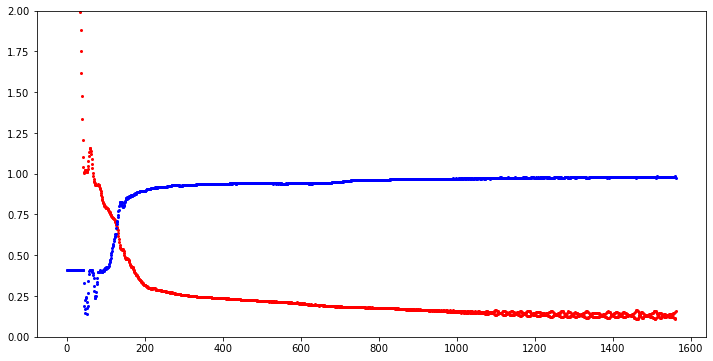

In [16]:
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,6))
plt.ylim(0,2)
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)

plt.show()

# MNIST

In [763]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [764]:
from sklearn.datasets import load_digits
digits = load_digits()
data_df = pd.DataFrame(digits.data)
data_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [765]:
# 데이터 입력
X = data_df.astype(float)
Y_obj = digits.target.astype(float)

In [766]:
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [767]:
# 원 핫 인코딩
Y_encoded = tf.keras.utils.to_categorical(Y)
Y_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [768]:
# 학습셋과 테스트셋의 구분
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, stratify=Y, random_state=seed)

In [887]:
# 모델 설정
model = Sequential([
    Dense(400, input_dim=64, activation='relu'),
    Dense(250, activation='relu'),
    Dense(120, activation='relu'),
    Dense(10, activation='softmax')
]) 
model.summary()

Model: "sequential_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_370 (Dense)            (None, 400)               26000     
_________________________________________________________________
dense_371 (Dense)            (None, 250)               100250    
_________________________________________________________________
dense_372 (Dense)            (None, 120)               30120     
_________________________________________________________________
dense_373 (Dense)            (None, 10)                1210      
Total params: 157,580
Trainable params: 157,580
Non-trainable params: 0
_________________________________________________________________


In [888]:
# 모델 컴파일 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [889]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [890]:
# 모델 저장 폴더 생성
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [891]:
# 모델명 설정
modelpath = MODEL_DIR + "mnist-{epoch:03d}-{val_loss:.4f}.hdf5"
checkpointer_callback2 = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [892]:
# 모델 실행 및 저장
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=1000, batch_size=20,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback2])


Epoch 00001: val_loss improved from inf to 0.10779, saving model to ./model/mnist-001-0.1078.hdf5

Epoch 00002: val_loss did not improve from 0.10779

Epoch 00003: val_loss improved from 0.10779 to 0.03804, saving model to ./model/mnist-003-0.0380.hdf5

Epoch 00004: val_loss improved from 0.03804 to 0.02334, saving model to ./model/mnist-004-0.0233.hdf5

Epoch 00005: val_loss improved from 0.02334 to 0.02008, saving model to ./model/mnist-005-0.0201.hdf5

Epoch 00006: val_loss improved from 0.02008 to 0.01903, saving model to ./model/mnist-006-0.0190.hdf5

Epoch 00007: val_loss improved from 0.01903 to 0.01027, saving model to ./model/mnist-007-0.0103.hdf5

Epoch 00008: val_loss improved from 0.01027 to 0.00912, saving model to ./model/mnist-008-0.0091.hdf5

Epoch 00009: val_loss improved from 0.00912 to 0.00694, saving model to ./model/mnist-009-0.0069.hdf5

Epoch 00010: val_loss did not improve from 0.00694

Epoch 00011: val_loss improved from 0.00694 to 0.00622, saving model to ./m


Epoch 00101: val_loss did not improve from 0.00032

Epoch 00102: val_loss improved from 0.00032 to 0.00032, saving model to ./model/mnist-102-0.0003.hdf5

Epoch 00103: val_loss improved from 0.00032 to 0.00030, saving model to ./model/mnist-103-0.0003.hdf5

Epoch 00104: val_loss improved from 0.00030 to 0.00028, saving model to ./model/mnist-104-0.0003.hdf5

Epoch 00105: val_loss did not improve from 0.00028

Epoch 00106: val_loss improved from 0.00028 to 0.00026, saving model to ./model/mnist-106-0.0003.hdf5

Epoch 00107: val_loss improved from 0.00026 to 0.00025, saving model to ./model/mnist-107-0.0002.hdf5

Epoch 00108: val_loss improved from 0.00025 to 0.00025, saving model to ./model/mnist-108-0.0002.hdf5

Epoch 00109: val_loss improved from 0.00025 to 0.00024, saving model to ./model/mnist-109-0.0002.hdf5

Epoch 00110: val_loss improved from 0.00024 to 0.00023, saving model to ./model/mnist-110-0.0002.hdf5

Epoch 00111: val_loss did not improve from 0.00023

Epoch 00112: val_lo


Epoch 00222: val_loss did not improve from 0.00006

Epoch 00223: val_loss did not improve from 0.00006

Epoch 00224: val_loss did not improve from 0.00006

Epoch 00225: val_loss did not improve from 0.00006

Epoch 00226: val_loss did not improve from 0.00006

Epoch 00227: val_loss did not improve from 0.00006

Epoch 00228: val_loss did not improve from 0.00006

Epoch 00229: val_loss did not improve from 0.00006

Epoch 00230: val_loss did not improve from 0.00006

Epoch 00231: val_loss did not improve from 0.00006

Epoch 00232: val_loss did not improve from 0.00006

Epoch 00233: val_loss did not improve from 0.00006

Epoch 00234: val_loss did not improve from 0.00006

Epoch 00235: val_loss did not improve from 0.00006

Epoch 00236: val_loss did not improve from 0.00006

Epoch 00237: val_loss did not improve from 0.00006

Epoch 00238: val_loss did not improve from 0.00006

Epoch 00239: val_loss did not improve from 0.00006

Epoch 00240: val_loss did not improve from 0.00006

Epoch 00241

In [893]:
del model

In [894]:
model = load_model('./model/mnist-211-0.0001.hdf5')

In [895]:
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=2)[1]))

360/360 - 0s - loss: 0.1577 - accuracy: 0.9861

 Accuracy: 0.9861
